In [1]:
import vitaldb
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline
import numpy as np

In [109]:
df = pd.read_csv("cases.csv")
df.columns

Index(['caseid', 'subjectid', 'casestart', 'caseend', 'anestart', 'aneend',
       'opstart', 'opend', 'adm', 'dis', 'icu_days', 'death_inhosp', 'age',
       'sex', 'height', 'weight', 'bmi', 'asa', 'emop', 'department', 'optype',
       'dx', 'opname', 'approach', 'position', 'ane_type', 'preop_htn',
       'preop_dm', 'preop_ecg', 'preop_pft', 'preop_hb', 'preop_plt',
       'preop_pt', 'preop_aptt', 'preop_na', 'preop_k', 'preop_gluc',
       'preop_alb', 'preop_ast', 'preop_alt', 'preop_bun', 'preop_cr',
       'preop_ph', 'preop_hco3', 'preop_be', 'preop_pao2', 'preop_paco2',
       'preop_sao2', 'cormack', 'airway', 'tubesize', 'dltubesize', 'lmasize',
       'iv1', 'iv2', 'aline1', 'aline2', 'cline1', 'cline2', 'intraop_ebl',
       'intraop_uo', 'intraop_rbc', 'intraop_ffp', 'intraop_crystalloid',
       'intraop_colloid', 'intraop_ppf', 'intraop_mdz', 'intraop_ftn',
       'intraop_rocu', 'intraop_vecu', 'intraop_eph', 'intraop_phe',
       'intraop_epi', 'intraop_ca'],
     

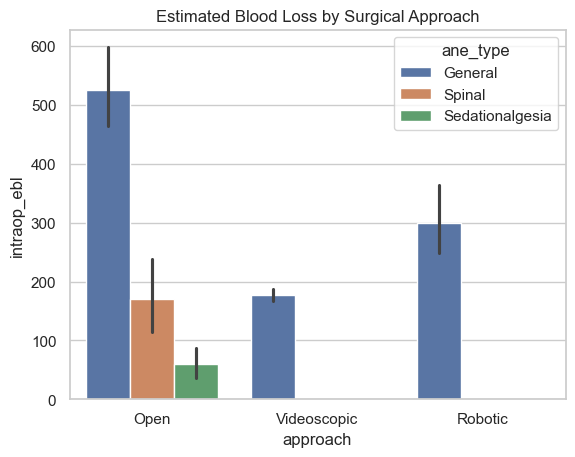

In [110]:
sns.barplot(
    data=df,
    x="approach",
    y="intraop_ebl",
    hue="ane_type"
)
plt.title("Estimated Blood Loss by Surgical Approach")
plt.show()

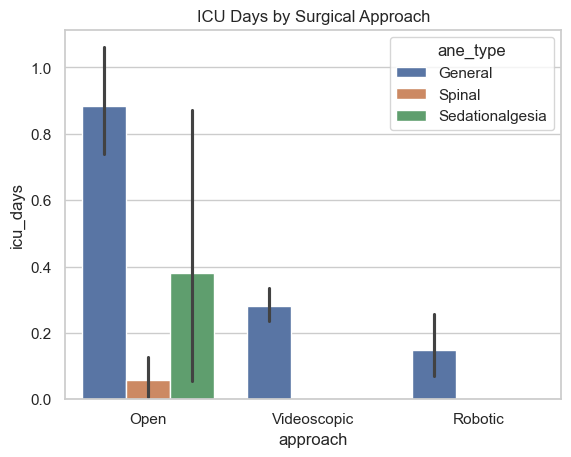

In [111]:
sns.barplot(
    data=df,
    x="approach",
    y="icu_days",
    hue="ane_type"
) 
plt.title("ICU Days by Surgical Approach")
plt.show()

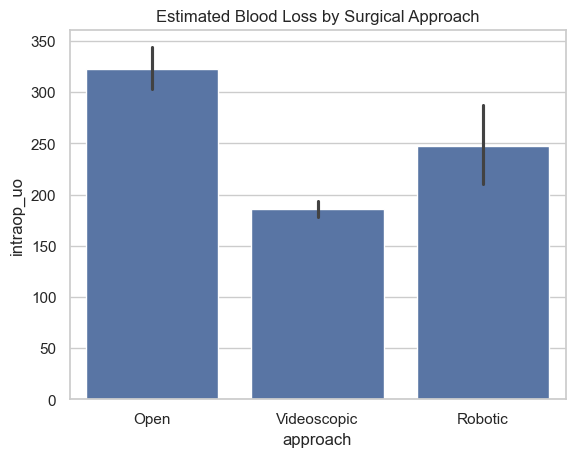

In [85]:
sns.barplot(
    data=df,
    x="approach",
    y="intraop_uo",
)
plt.title("Estimated Blood Loss by Surgical Approach")
plt.show()

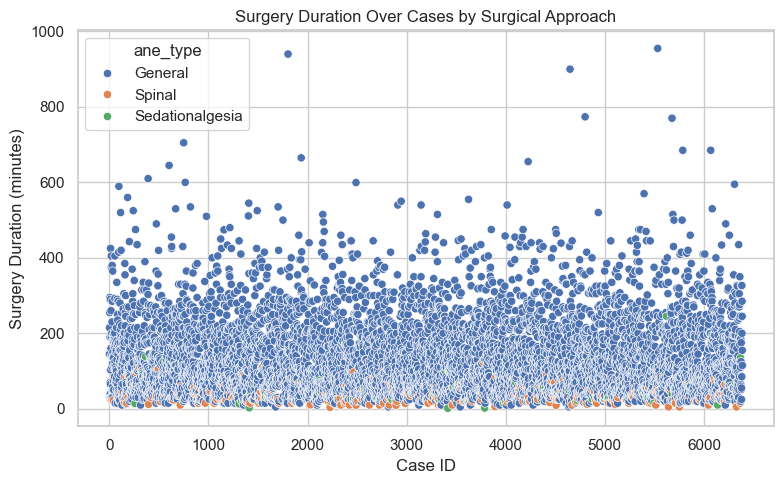

In [ ]:
df_sorted["surgery_duration"] = (df_sorted["opend"] - df_sorted["opstart"]) / 60
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_sorted,
    x="caseid",
    y="surgery_duration",
    hue="ane_type"
)
plt.title("Surgery Duration Over Cases by Surgical Approach")
plt.xlabel("Case ID")
plt.ylabel("Surgery Duration (minutes)")
plt.tight_layout()
plt.show()

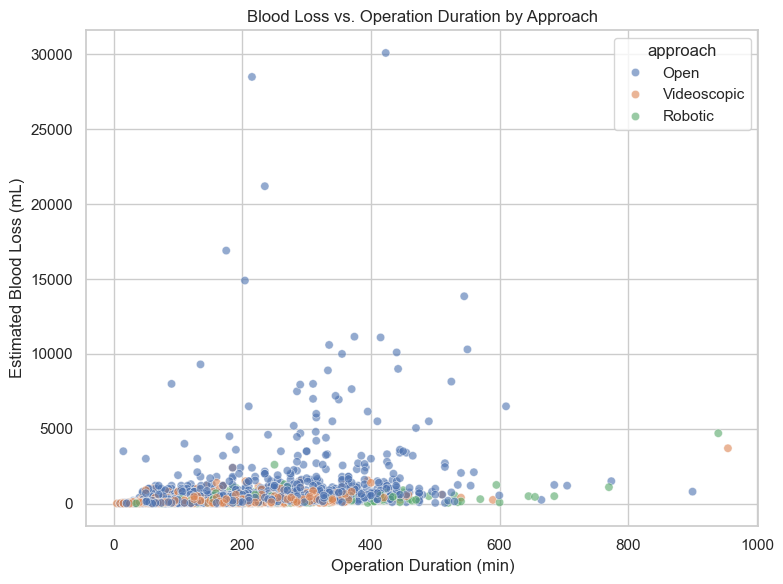

In [72]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x=(df['opend'] - df['opstart']) / 60,
    y='intraop_ebl',
    hue='approach',
    alpha=0.6
)
plt.title('Blood Loss vs. Operation Duration by Approach')
plt.xlabel('Operation Duration (min)')
plt.ylabel('Estimated Blood Loss (mL)')
plt.tight_layout()
plt.show()

C:\Users\15623\AppData\Local\Temp\ipykernel_19600\4192979571.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  g = sns.catplot(


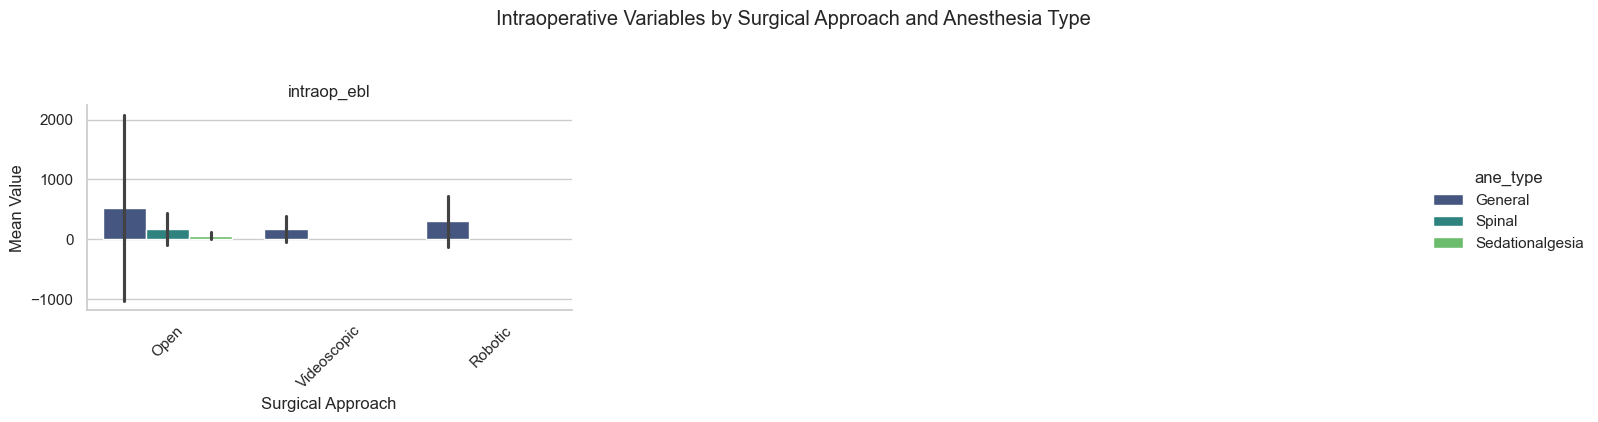

In [102]:
df.columns = df.columns.str.strip()

# Set plot style
sns.set(style="whitegrid")

# Select variables to summarize
variables_to_plot = [
    "intraop_ebl"
]

# Melt the data to long format for seaborn plotting
df_long = df.melt(id_vars=["approach", "ane_type"], value_vars=variables_to_plot,
                  var_name="variable", value_name="value")

# Drop NaNs
df_long = df_long.dropna()

# Plot: Average values by approach and anesthesia type
g = sns.catplot(
    data=df_long,
    x="approach",
    y="value",
    hue="ane_type",
    col="variable",
    kind="bar",
    ci="sd",
    col_wrap=3,
    height=4,
    aspect=1.2,
    palette="viridis"
)

g.set_titles("{col_name}")
g.set_axis_labels("Surgical Approach", "Mean Value")
g.fig.suptitle("Intraoperative Variables by Surgical Approach and Anesthesia Type", y=1.05)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

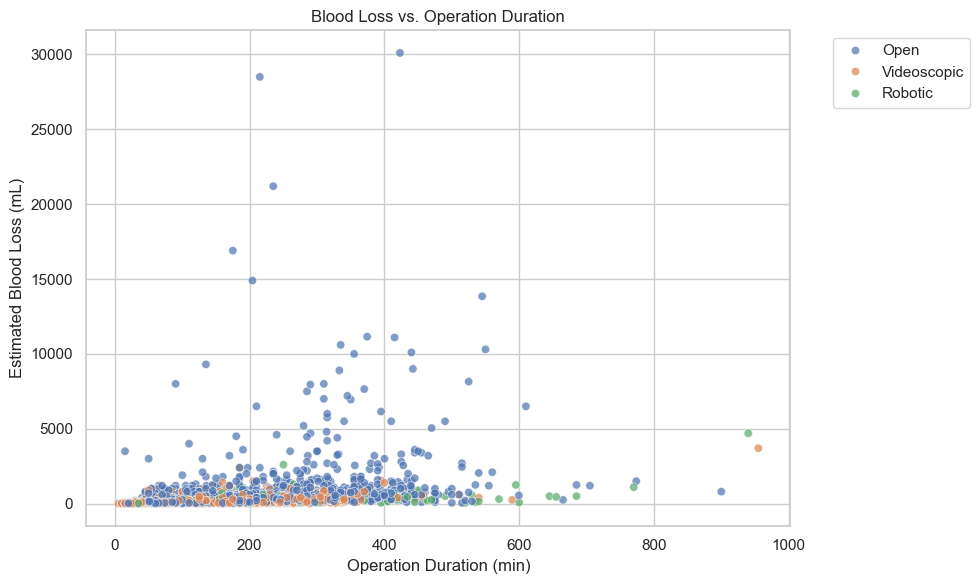

In [68]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x=(df['opend'] - df['opstart']) / 60,  # op duration in minutes
    y='intraop_ebl',
    hue='approach',
  
    alpha=0.7
)
plt.title('Blood Loss vs. Operation Duration')
plt.xlabel('Operation Duration (min)')
plt.ylabel('Estimated Blood Loss (mL)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

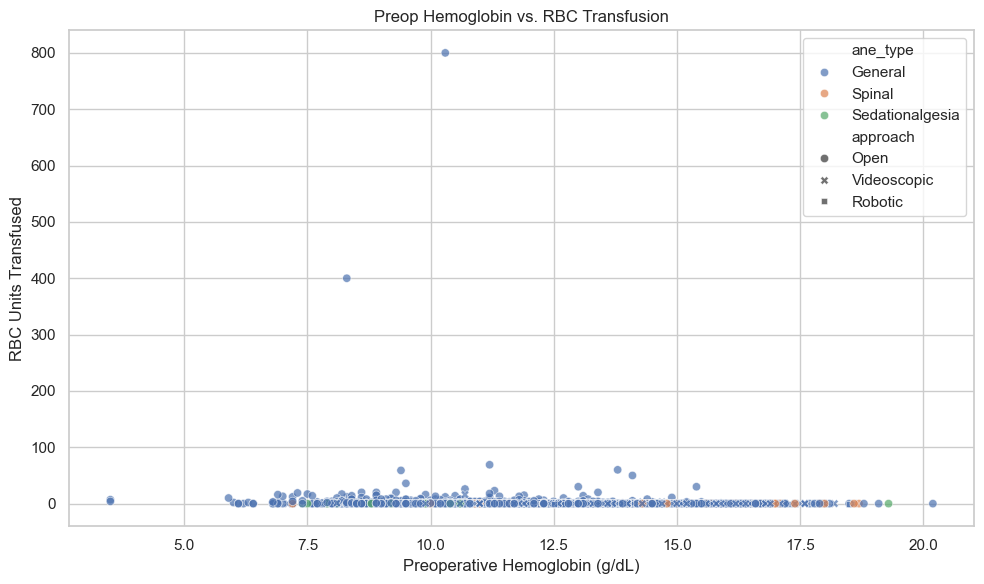

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df,
    x='preop_hb',
    y='intraop_rbc',
    hue='ane_type',
    style='approach',
    alpha=0.7
)
plt.title('Preop Hemoglobin vs. RBC Transfusion')
plt.xlabel('Preoperative Hemoglobin (g/dL)')
plt.ylabel('RBC Units Transfused')
plt.tight_layout()
plt.show()

C:\Users\15623\AppData\Local\Temp\ipykernel_19600\1274575938.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_temp['op_duration_min'] = (filtered_temp['opend'] - filtered_temp['opstart']) / 60


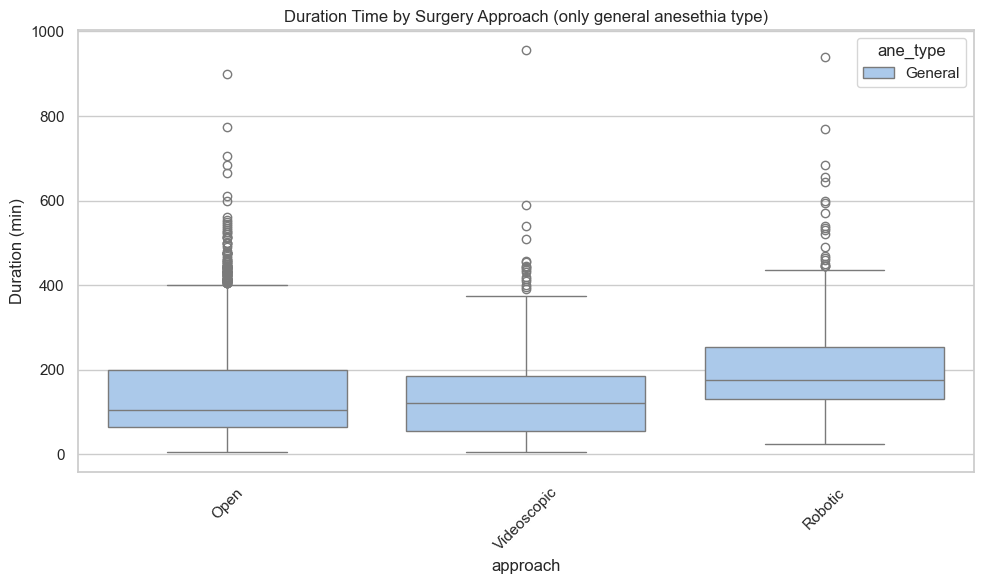

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca,op_duration_min
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,120,0.0,100,70,0,10,0,0,0,145.0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,150,0.0,0,100,0,20,0,0,0,215.0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0.0,0,50,0,0,0,0,0,32.0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,80,0.0,100,100,0,50,0,0,0,255.0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0.0,0,160,0,10,900,0,2100,295.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15248,-260,15640.0,2140,14140,-215340,648660,...,150,0.0,0,90,0,20,0,0,0,200.0
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,100,0.0,0,100,0,25,30,0,300,285.0
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,70,0.0,0,130,0,10,0,0,0,245.0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,120,0.0,0,50,0,0,0,0,0,155.0


In [114]:
# Calculate operation duration
filtered_temp = df[df['ane_type'] == 'General']

# Compute operation duration in minutes
filtered_temp['op_duration_min'] = (filtered_temp['opend'] - filtered_temp['opstart']) / 60

# Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_temp, x='approach', y='op_duration_min', hue='ane_type', palette='pastel')
plt.title('Duration Time by Surgery Approach (only general anesethia type)')
plt.ylabel('Duration (min)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
filtered_temp

In [59]:
sns.scatterplot(
    data=df,
    x="preop_ebl",
    y="intraop_ebl"
)

ValueError: Could not interpret value `preop_ebl` for `x`. An entry with this name does not appear in `data`.

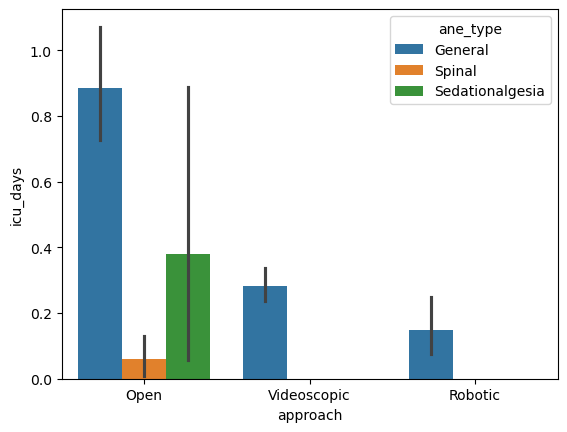

In [ ]:
sns.lineplot(
    data=df,
    x="approach",
    y="icu_days",
    hue="ane_type"
)
plt.show()

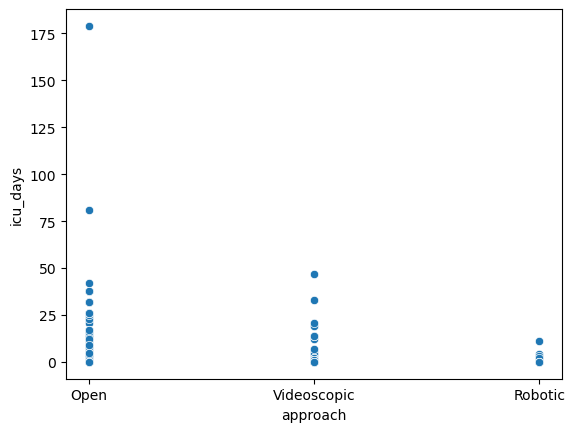

In [42]:
sns.scatterplot(
    data=df,
    x="approach",
    y="icu_days",
)
plt.show()

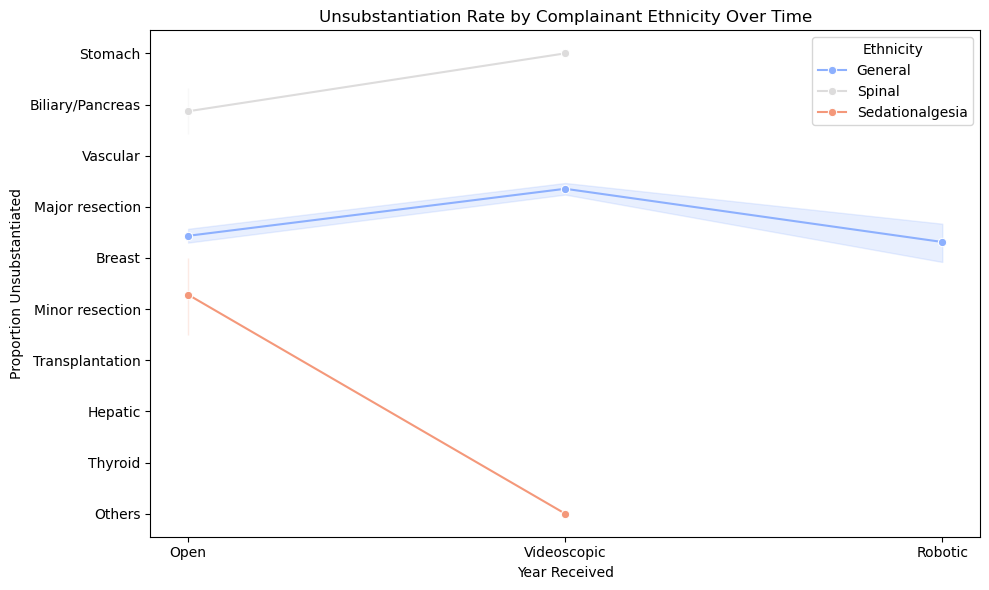

In [33]:

# Line plot
plt.figure(figsize=(10, 6))
sns.lineplot(
    data=df,
    x='approach',
    y='optype',
    hue='ane_type',
    marker='o',
    palette='coolwarm'
)

plt.title('Unsubstantiation Rate by Complainant Ethnicity Over Time')
plt.xlabel('Year Received')
plt.ylabel('Proportion Unsubstantiated')
plt.legend(title='Ethnicity')
plt.tight_layout()
plt.show()

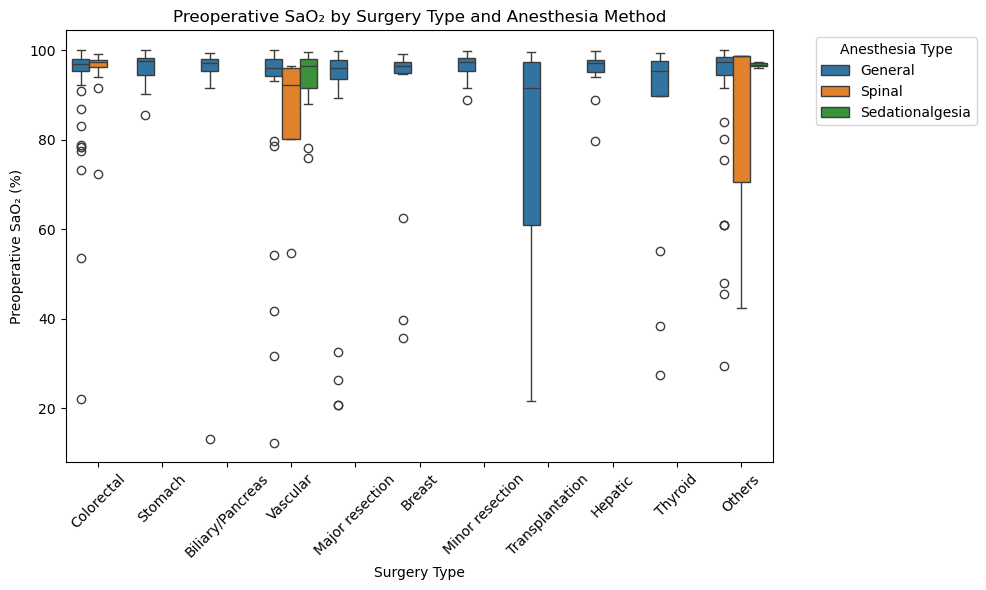

In [ ]:


plt.figure(figsize=(10, 6))
sns.boxplot(x="optype", y="preop_sao2", hue="ane_type", data=df)
plt.title("Preoperative SaO₂ by Surgery Type and Anesthesia Method")
plt.ylabel("Preoperative SaO₂ (%)")
plt.xlabel("Surgery Type")
plt.legend(title="Anesthesia Type", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

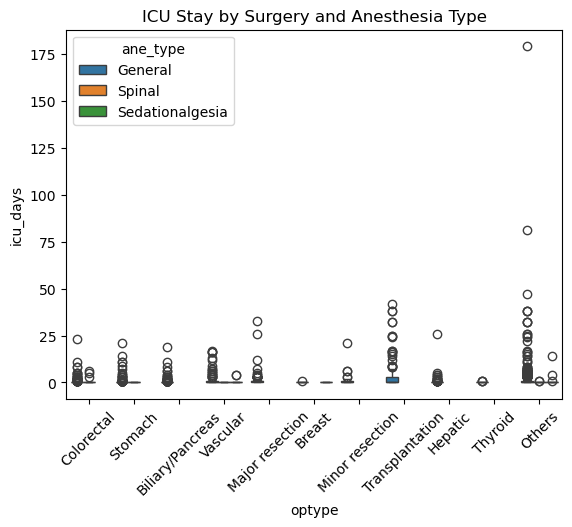

In [30]:
sns.boxplot(x="optype", y="icu_days", hue="ane_type", data=df)
plt.title("ICU Stay by Surgery and Anesthesia Type")
plt.xticks(rotation=45)
plt.show()

In [ ]:
example_case["time"] = range(len(example_case))

In [23]:
# Filter data for a specific surgery type and patient case
example_case = df[df["caseid"] == 6384]  # Replace with a valid case_id
example_case["time"] = range(len(example_case))
# Plot HR, MAP, and SpO2 if available
plt.figure(figsize=(14, 6))
sns.lineplot(data=example_case, x="time", y="HR", label="Heart Rate", color="red")
sns.lineplot(data=example_case, x="time", y="MAP", label="Mean Arterial Pressure", color="blue")
sns.lineplot(data=example_case, x="time", y="SpO2", label="Oxygen Saturation", color="green")

plt.title(f"Vital Signs Over Time – Case {1234}, {example_case['optype'].iloc[0]}")
plt.xlabel("Time (s)")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\15623\AppData\Local\Temp\ipykernel_19600\1585465310.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  example_case["time"] = range(len(example_case))


ValueError: Could not interpret value `HR` for `y`. An entry with this name does not appear in `data`.

<Figure size 1400x600 with 0 Axes>

<Axes: xlabel='optype', ylabel='icu_days'>

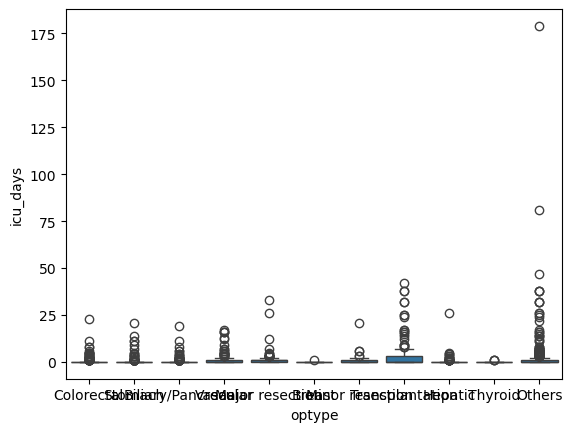

In [14]:
#mean heart rate by surgical type

sns.boxplot(x="optype", y="icu_days", data=df)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: assume df_case already exists
# Columns: time (in seconds), HR, MAP, SpO2

plt.figure(figsize=(12, 6))
plt.plot(df_case["time"], df_case["HR"], label="Heart Rate (bpm)", color="red")
plt.plot(df_case["time"], df_case["MAP"], label="Mean Arterial Pressure (mmHg)", color="blue")
plt.plot(df_case["time"], df_case["SpO2"], label="SpO2 (%)", color="green")

plt.title("Vital Signs Over Time for Case #1234 (e.g., Thoracic Surgery, General Anesthesia)")
plt.xlabel("Time (seconds)")
plt.ylabel("Measurement")
plt.legend(loc="upper right")
plt.grid(True)
plt.tight_layout()
plt.show()